## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import keras
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
  input_layer = keras.layers.Input(input_shape)
  
  for i, n_units in enumerate(num_neurons):
      if i == 0:
          x = keras.layers.Dense(
              units=n_units, 
              activation="relu", 
              name="hidden_layer"+str(i+1))(input_layer)
          x = BatchNormalization()(x)
      else:
          x = keras.layers.Dense(units=n_units, 
              activation="relu", 
              name="hidden_layer"+str(i+1))(x)
          x = BatchNormalization()(x)
  
  out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
  
  model = keras.models.Model(inputs=[input_layer], outputs=[out])
  return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

## 比較 save_best_only 與否的差異

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
model_ckpt = ModelCheckpoint(
          filepath="tmp.h5", 
          monitor="val_loss", 
          save_best_only=True)

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}

model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt],
          verbose=0
        )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

# Load back
model = keras.models.load_model("tmp.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test) 

313/313 [==============================] - 1s 2ms/step - loss: 1.4442 - accuracy: 0.4977


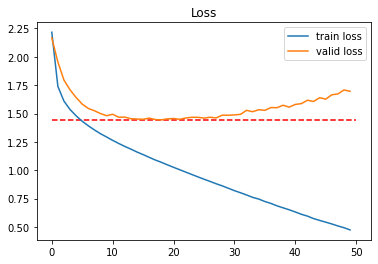

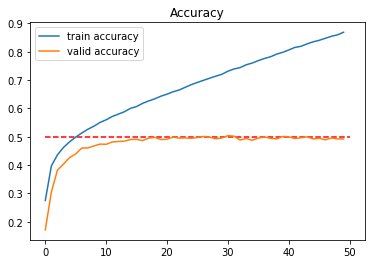

In [8]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
model_ckpt = ModelCheckpoint(
          filepath="tmp2.h5", 
          monitor="val_loss", 
          save_best_only=False)

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results.clear()

model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt],
          verbose=0
        )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

# Load back
model = keras.models.load_model("tmp2.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7070 - accuracy: 0.4894


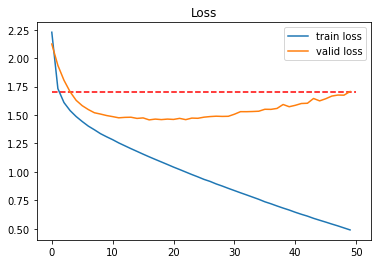

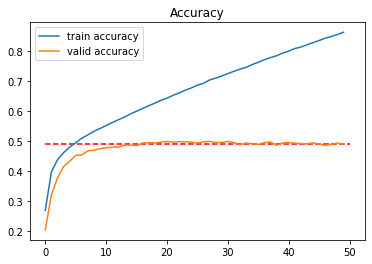

In [10]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()

## 將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [11]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
model_ckpt = ModelCheckpoint(
          filepath="tmp3.h5", 
          monitor="val_loss",          
          save_weights_only=True)


model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt],
          verbose=1
        )



Epoch 1/50
49/49 [==============================] - 1s 16ms/step - loss: 2.4772 - accuracy: 0.2060 - val_loss: 2.1199 - val_accuracy: 0.1863
Epoch 2/50
49/49 [==============================] - 1s 11ms/step - loss: 1.7713 - accuracy: 0.3845 - val_loss: 1.9740 - val_accuracy: 0.2812
Epoch 3/50
49/49 [==============================] - 1s 11ms/step - loss: 1.6270 - accuracy: 0.4276 - val_loss: 1.8427 - val_accuracy: 0.3527
Epoch 4/50
49/49 [==============================] - 1s 11ms/step - loss: 1.5513 - accuracy: 0.4560 - val_loss: 1.7480 - val_accuracy: 0.3865
Epoch 5/50
49/49 [==============================] - 1s 12ms/step - loss: 1.4934 - accuracy: 0.4773 - val_loss: 1.6435 - val_accuracy: 0.4248
Epoch 6/50
49/49 [==============================] - 1s 11ms/step - loss: 1.4408 - accuracy: 0.4965 - val_loss: 1.5979 - val_accuracy: 0.4421
Epoch 7/50
49/49 [==============================] - 1s 11ms/step - loss: 1.4064 - accuracy: 0.5055 - val_loss: 1.5601 - val_accuracy: 0.4487
Epoch 8/50
49

In [12]:
model2 = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model2.load_weights("tmp3.h5", by_name=False)


loss_loadback, acc_loadback = model2.evaluate(x_test, y_test) 
print(f'Loss:{loss_loadback} Acuracy:{acc_loadback}')


313/313 [==============================] - 1s 2ms/step - loss: 1.7107 - accuracy: 0.4915
Loss:1.6952605247497559 Acuracy:0.49219998717308044
